# HOMEWORK: DESIGN OF A FODO CELL FOR A ELECTRON CIRCULAR ACCELERATOR 

1. We want to design a circular accelerator for 4 GeV electrons composed by FODO cells according to the following conditions:

    - We have only normal conducting magnets at our disposal with max. field strengths:
        - For dipole magnets: Bmax ≤ 2 T and ld ≤ 5 m.
        - For quadrupole magnets: dBy/dx|max ≤ 25 T/m & and lq≤1.5 m.

    - Consider a FODO μ=90° and with the help of the thin lense approximation parametric plots from Tutorial 1 set the strength of quadrupoles such that the βmax is 120 m in both planes. (HINT: use both, Figure 1 and Figure 2, to define the lenght of the FODO cell and the strength for a fixed quadrupole lenght of your choice).

    - Consider 4 dipoles per FODO cell.

    - The circumference of the ring has to be 1000 m accounting for the FODO cells and about a ~30% margin for other insertions (pick a nice round number). (HINT: This information together with the length of the FODO cell allows you to fix the number of FODO cells that fits into your ring and hence the required angle of the bending magnets). 
    
**USEFUL formulas**:
    
   - FODO stbility condition: $f>L_{cell}/4$.
    
    
   - Normalized focusing strength: $k [m^{-2}]\approx 0.3 G[T/m]/P[GeV/c]/q[e]$.
    
    
   - Normalized bending strength: $1/\rho[m] \approx 0.3 B[T]/P[GeV/c]/q[e]$.

Define a lattice according to the boundary conditions defined above, and find the optics using MAD-X.

2. What is the $\beta_{x,max}$ and $\beta_{y,max}$ computed by MAD-X? What is happening on the horizontal plane? Why?


4. Refine the design to set the $\beta_{x,max}$ and $\beta_{y,max}$ closer to 120 m using a MAD-X matching block? In this case as we are not matching  global parameter you need to use the "CONSTRAINT" command as follow:

        MATCH, SEQUENCE=myCell;
        CONSTRAINT, SEQUENCE=myCell, RANGE=q1, BETX=120.0;
        VARY, NAME= myKF, STEP=0.00001;
        VARY, NAME= myKD, STEP=0.00001;
        LMDIF, CALLS=50, TOLERANCE=1e-6;//method adopted
        ENDMATCH;
        
5. Considering a round beam (same horizontal and vertical sizes) and a normalized emittance value of 4.58 nm rad compute the corresponding beam size for $\beta_{max}$=120 m.


In [69]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from cpymad.madx import Madx 

In [70]:
#Values for bmax=120
#From the parametric plots we can get that for a phase advance of 90 degrees K*Lcell*Lq=2.825
#And for this value on the second plot bmax/lcell=1.716
#If bmax=120 -> Lcell=
print(120/1.716)
#And the k=
print(2.825/70)

69.93006993006993
0.04035714285714286


In [71]:
#We can check that the stability condition is satisfied for the chosen lq= 1m
1/0.04
70/4

17.5

In [72]:
#We need to check that the required strength is available by the magnets at our disposal
# k=0.3*G[T/m]/P[GeV/c]*c*q[e]
0.04*4/0.3

0.5333333333333333

In [73]:
#Now we need to determine the parameters for the dipoles.
#Assuming that the Lcell=70 m and that the FODO cells occupy 70% of the ring we compute the Ncells
(0.7*1000)/70

10.0

In [74]:
#The number of dipoles are
10*4

40

In [75]:
#Now we can compute the angle 2*pi=Ndipoles*theta
2*np.pi/40

0.15707963267948966

In [76]:
#We need to compute now the required dipoles strenght and number of dipoles
#1/rho=0.3*B[T]/P[GeV/c]*c*q[e]
4/(0.3*31.84)

0.4187604690117253

In [78]:
myMad = Madx()
myString='''

! *********************************************************************
! Definition of parameters
! *********************************************************************

quadrupoleLength=1;
dipoleLength=5;
cellLength=70;

myK=0.040;
myAngle=0.157;

! *********************************************************************
! Definition of magnets
! ********************************************************************* 

QF: quadrupole, L=quadrupoleLength, K1:=myK;
QD: quadrupole, L=quadrupoleLength, K1:=-myK;
BM: sbend, L=dipoleLength, angle:=myAngle; 

! *********************************************************************
! Definition of sequence
! *********************************************************************

myCell:sequence, refer=entry, L=cellLength;
q1: QF, at=0;
B1: BM, at =5+quadrupoleLength/2, from=q1;
B2: BM, at =5+dipoleLength/2, from=B1;
q2: QD, at=cellLength/2;
B3: BM, at =5+quadrupoleLength/2, from=q2;
B4: BM, at =5+dipoleLength/2, from=B3;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=electron, energy=4.938;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS
! *********************************************************************
twiss, table=first_twiss, file=/Users/nuria/Desktop/JUAS2022/exercice.txt;
plot, table=first_twiss, haxis=s, vaxis=betx,bety ,colour=100, file=/Users/nuria/Desktop/JUAS2022/exercice;

'''
myMad.input(myString);


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2021.12.20 12:53:11      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
                70                 -0       0.1133597226         2.97009686 

                q1                dq1            betxmax              dxmax 
      0.3240223299      -0.2894713472        105.9701387        18.28374049 

             dxrms             xcomax             xcorms                 q2 
        14.1747586                  0                  0       0.2438418116 

               dq2            betymax              dymax 

In [79]:
first_df=myMad.table['first_twiss'].dframe()
first_df[["name", "keyword","s","betx","bety","alfx","alfy","dx","dpx","dy","dpy"]]

,name,keyword,s,betx,bety,alfx,alfy,dx,dpx,dy,dpy
#s,mycell$start:1,marker,0.0,105.685576,21.784027,-2.259230,0.457352,18.283740,0.348956,0.0,-0.0
q1,q1:1,quadrupole,1.0,105.970139,21.784027,1.978472,-0.457352,18.265918,-0.384483,0.0,0.0
drift_0[0],drift_0:0,drift,6.0,87.344790,27.745231,1.746598,-0.734889,16.343501,-0.384483,0.0,0.0
b1,b1:1,sbend,11.0,69.178961,36.481797,1.856668,-1.012425,14.619655,-0.303638,0.0,0.0
drift_1[0],drift_1:0,drift,16.0,52.219426,47.993725,1.535239,-1.289961,13.101463,-0.303638,0.0,0.0
b2,b2:1,sbend,21.0,37.435437,62.281015,1.397224,-1.567497,11.820058,-0.207871,0.0,0.0
drift_2[0],drift_2:0,drift,35.0,13.770118,117.050351,0.293155,-2.344598,8.909871,-0.207871,0.0,0.0
q2,q2:1,quadrupole,36.0,13.806154,117.050351,-0.329671,2.344598,8.879404,0.146734,0.0,0.0
drift_3[0],drift_3:0,drift,41.0,19.110447,94.992048,-0.731188,2.067062,9.613072,0.146734,0.0,0.0
b3,b3:1,sbend,46.0,27.826717,75.709107,-0.997719,1.789526,10.617192,0.254089,0.0,0.0


<IPython.core.display.Javascript object>


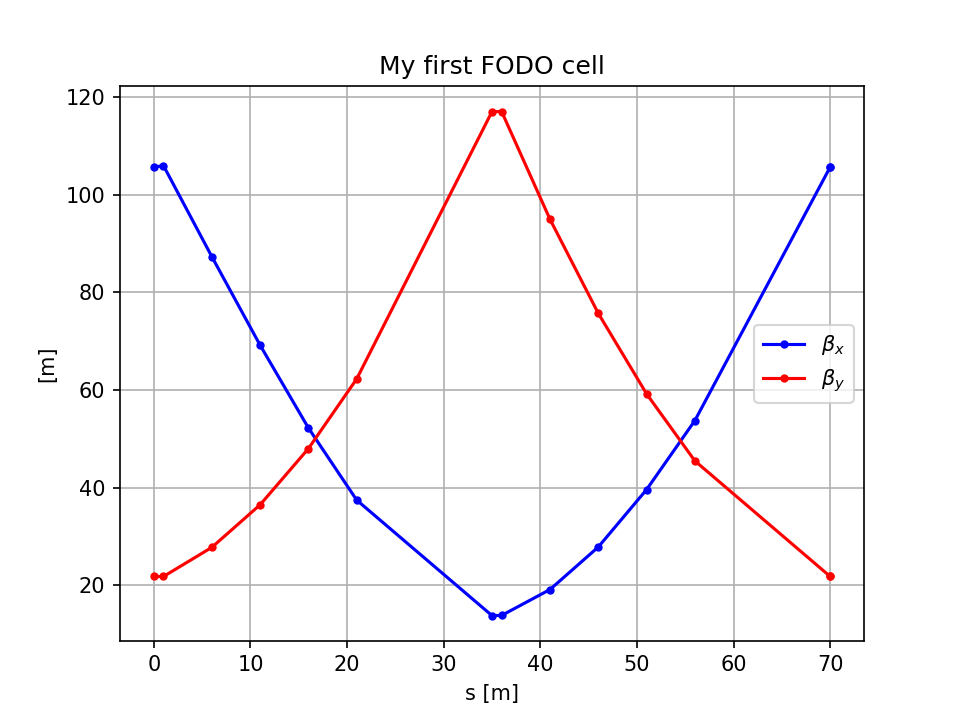

Text(0.5, 1.0, 'My first FODO cell')

In [80]:
%matplotlib notebook
# Plot
plt.plot(first_df['s'],first_df['betx'],'.-b',label='$\\beta_x$')
plt.plot(first_df['s'],first_df['bety'],'.-r',label='$\\beta_y$')
plt.legend()
plt.grid()
plt.xlabel('s [m]')
plt.ylabel('[m]')
plt.title('My first FODO cell')

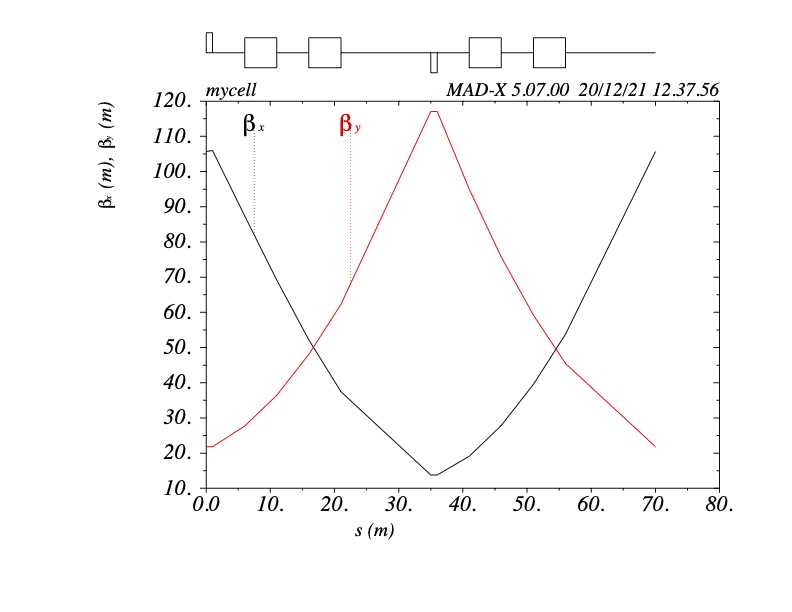

In [84]:
myMad = Madx()
myString='''

! *********************************************************************
! Definition of parameters
! *********************************************************************

quadrupoleLength=1;
dipoleLength=5;
cellLength=70;


myKF=0.04;
myKD=-0.04;
myAngle=0.157;

! *********************************************************************
! Definition of magnets
! ********************************************************************* 

QF: quadrupole, L=quadrupoleLength, K1:=myKF;
QD: quadrupole, L=quadrupoleLength, K1:=myKD;
BM: sbend, L=dipoleLength, angle:=myAngle; 

! *********************************************************************
! Definition of sequence
! *********************************************************************

myCell:sequence, refer=entry, L:=cellLength;
q1: QF, at=0;
B1: BM, at =5+quadrupoleLength/2, from=q1;
B2: BM, at =5+dipoleLength/2, from=B1;
q2: QD, at=cellLength/2;
B3: BM, at =5+quadrupoleLength/2, from=q2;
B4: BM, at =5+dipoleLength/2, from=B3;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=electron, energy=4;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS BEFORE MATCHING
! *********************************************************************

twiss, table=beforematching, file="/Users/nuria/Desktop/JUAS2022/BeforeMatching.txt";

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! MATCHING
! *********************************************************************

MATCH, SEQUENCE=myCell;
CONSTRAINT, SEQUENCE=myCell, RANGE=q1, BETX=120.0;
CONSTRAINT, SEQUENCE=myCell, RANGE=q2, BETY=120.0;
VARY, NAME= myKF, STEP=0.000001;
VARY, NAME= myKD, STEP=0.000001;
LMDIF, CALLS=2000, TOLERANCE=1e-12;//method adopted
ENDMATCH;

twiss, table=afterematching, file="/Users/nuria/Desktop/JUAS2022/AfterMatching.txt";
plot, table=afterematching, haxis=s, vaxis=betx,bety,dx,colour=100, title="AfterMatching", file="/Users/nuria/Desktop/JUAS2022/AfterMatching";

'''
myMad.input(myString);


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2021.12.20 12:56:41      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
                70                 -0       0.1133597226         2.97009686 

                q1                dq1            betxmax              dxmax 
      0.3240223299       -0.289471348        105.9701387        18.28374054 

             dxrms             xcomax             xcorms                 q2 
       14.17475864                  0                  0       0.2438418116 

               dq2            betymax              dymax 

In [35]:
#Computation of the gamma
4/0.938

4.264392324093817

In [36]:
#Computation of the beam size
np.sqrt(4.58e-9/4.26*120)

0.00035918530664135227

In [37]:
#~360 um